In [ ]:
pip uninstall sklearn

Uninstalling sklearn-0.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/sklearn-0.0.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled sklearn-0.0


In [ ]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=154d57c575bd8df815e6d58f0dbfb3225e0134481440185bb9a6b7625395559a
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [3]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 3.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=4cd94f4165537a530b3eeea818514bd64d20c02db577949e171ae2ef07011864
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [4]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [2]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [5]:
# Define three cluster centers

centers = [ [4, 2],
            [1, 7],
            [5, 6] ]

centers

[[4, 2], [1, 7], [5, 6]]

In [6]:
# Define three cluster sigmas in x and y, respectively

sigmas = [[0.8, 0.3],
        [0.3, 0.5],
        [1.1, 0.7]]

sigmas

[[0.8, 0.3], [0.3, 0.5], [1.1, 0.7]]

In [9]:
# Generate test data
np.random.seed(42) # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

labels

array([0.])

In [18]:
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

[0.         3.10028633 2.77270866 5.02214146 4.26585121 3.40121077
 5.24092158 4.09253971 4.94343775 4.05401479 5.64859834 5.40427267
 3.80082868 4.77725676 4.51630076 5.09490525 3.22806123 4.54884117
 4.84673959 2.59300841 3.05339319 2.36861426 3.78447453 4.5740338
 5.20188564 4.05927582 5.30289244 2.89591883 2.63729405 3.95556184
 4.30725236 3.9738442  2.34604632 3.92870397 2.9564244  4.53573804
 4.2932786  3.24809617 3.58890647 3.15262918 3.94985672 4.76411386
 3.21141916 4.40323721 3.57579391 3.36570173 3.91437571 3.17180614
 3.55708056 3.04169769 5.57178011 4.02821084 3.44021959 4.17118393
 3.91013756 3.82322432 4.49133336 4.60600617 3.57559908 3.53934541
 3.77995864 2.15846307 2.78784715 5.09349941 5.31597417 3.80077117
 4.46124557 4.24900012 6.46310465 4.89565993 3.89766593 3.23556765
 2.71484294 4.16277091 3.3949194  2.86219703 3.48274169 3.1347616
 5.34971331 4.70531181 3.99362189 5.18395531 4.06189465 3.31097264
 5.21849926 4.43112803 3.17020308 3.84772906 3.2995054  2.893760

In [25]:
len(xpts)

1201

In [26]:
len(labels)

1201

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

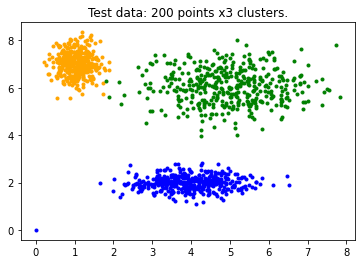

In [27]:
fig0, ax0 = plt.subplots()

for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
    color=colors[label])

ax0.set_title('Test data: 200 points x3 clusters.')

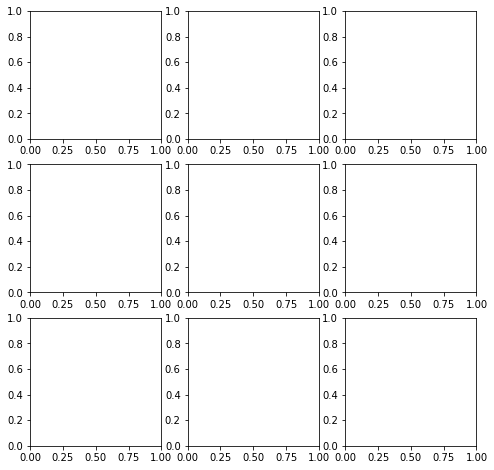

In [28]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))

alldata = np.vstack((xpts, ypts))

fpcs = []

In [29]:
axes1.reshape(-1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdda935dd30>,
      dtype=object)

In [30]:
axes1.shape

(3, 3)

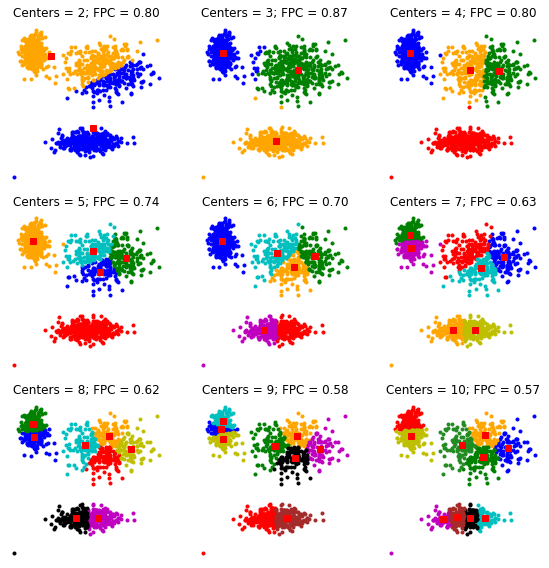

In [31]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    
    # Store fpc values for later
    fpcs.append(fpc)
    
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j])
    
    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
  
  
fig1.tight_layout()